##Import Library 

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 

##Fethcing Data from Kaggle 

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           6808        211  1.0              
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1719         74  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03          12606        319  1.0              
pantanjali/unemployment-dataset                                Un

In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d shenba/time-series-datasets # dataset API Command

  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 19.0MB/s]


In [9]:
!unzip time-series-datasets.zip

Archive:  time-series-datasets.zip
  inflating: Electric_Production.csv  
  inflating: daily-minimum-temperatures-in-me.csv  
  inflating: monthly-beer-production-in-austr.csv  
  inflating: sales-of-shampoo-over-a-three-ye.csv  


##Read Data

In [12]:
dti = pd.date_range(start='2020-01-01', periods = data.shape[0], freq ='M')
print(dti.month)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12],
           dtype='int64')


In [13]:
data = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv', index_col = "Month", parse_dates=True)
data.index = dti
data.columns = ['Sales']

In [14]:
data.head(30) #1962-01-01	

,Sales
2020-01-31,266.0
2020-02-29,145.9
2020-03-31,183.1
2020-04-30,119.3
2020-05-31,180.3
2020-06-30,168.5
2020-07-31,231.8
2020-08-31,224.5
2020-09-30,192.8
2020-10-31,122.9


In [15]:
data.tail(6)

,Sales
2022-07-31,575.5
2022-08-31,407.6
2022-09-30,682.0
2022-10-31,475.3
2022-11-30,581.3
2022-12-31,646.9


In [16]:
data.shape

(36, 1)

#ARIMA 

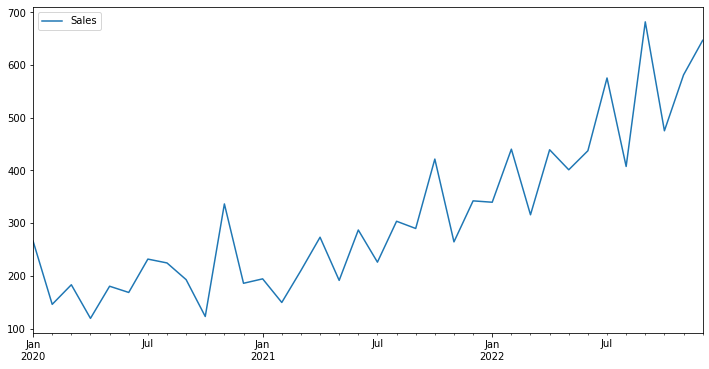

In [17]:
data.plot(figsize=(12,6))
plt.show()

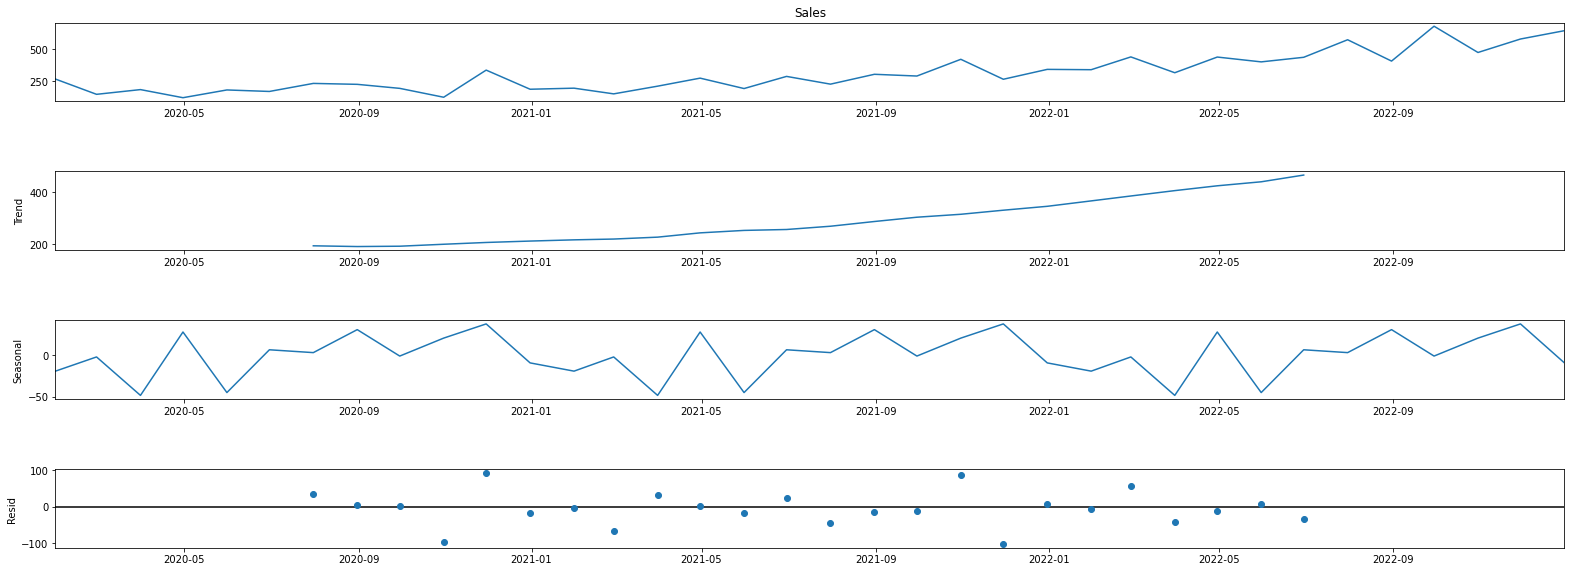

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data['Sales'])
fig = decomposed.plot()
fig.set_size_inches((25,9))
fig.show()

In [19]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 27.7 MB/s 
     |████████████████████████████████| 9.8 MB 57.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [20]:
train = data[:'2022-06-30']
test = data['2022-07-31':]
train.shape, test.shape, data.shape

((30, 1), (6, 1), (36, 1))

In [21]:
import pmdarima as pm

ImportError: ignored

In [ ]:
arima_model = pm.auto_arima(train['Sales'])
arima_model.order

In [ ]:
arima_pred =np.round(arima_model.predict(test.shape[0]), 2)
test['ARIMA_prediction'] = arima_pred

In [ ]:
test.head()

In [ ]:
test.plot(figsize=(12,6))
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['Sales'], test['ARIMA_prediction'])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['Sales'], test['ARIMA_prediction'])

#LSTM

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [24]:
train = data[:'2022-06-30']
test = data['2022-07-01':]
train.shape, test.shape, data.shape

((30, 1), (6, 1), (36, 1))

In [25]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_test[:10]

In [26]:
n_month = 12
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length= n_month, batch_size = 1)

In [27]:
generator[0]

(array([[[0.45686702],
         [0.08284024],
         [0.198692  ],
         [0.        ],
         [0.18997197],
         [0.15322329],
         [0.35035814],
         [0.32762379],
         [0.22890065],
         [0.01121146],
         [0.67642479],
         [0.20741202]]]), array([[0.2335721]]))

In [28]:
scaled_train[:15]

array([[0.45686702],
       [0.08284024],
       [0.198692  ],
       [0.        ],
       [0.18997197],
       [0.15322329],
       [0.35035814],
       [0.32762379],
       [0.22890065],
       [0.01121146],
       [0.67642479],
       [0.20741202],
       [0.2335721 ],
       [0.0940517 ],
       [0.28277795]])

In [29]:
generator[1][0].shape

(1, 12, 1)

In [30]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_month,1)),
    tf.keras.layers.LSTM(100, activation ='relu', return_sequences=True),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(generator, epochs=10)

Epoch 1/10
18/18 [==============================] - 8s 97ms/step - loss: 0.3381
Epoch 2/10
18/18 [==============================] - 1s 68ms/step - loss: 0.0902
Epoch 3/10
18/18 [==============================] - 1s 46ms/step - loss: 0.0444
Epoch 4/10
18/18 [==============================] - 1s 42ms/step - loss: 0.0444
Epoch 5/10
18/18 [==============================] - 1s 42ms/step - loss: 0.0385
Epoch 6/10
18/18 [==============================] - 1s 44ms/step - loss: 0.0336
Epoch 7/10
18/18 [==============================] - 1s 76ms/step - loss: 0.0353
Epoch 8/10
18/18 [==============================] - 1s 43ms/step - loss: 0.0396
Epoch 9/10
18/18 [==============================] - 1s 42ms/step - loss: 0.0406
Epoch 10/10
18/18 [==============================] - 1s 43ms/step - loss: 0.0414


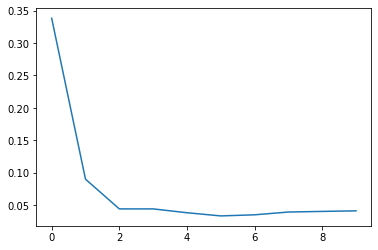

In [32]:
plt.plot(range(10), history.history['loss'])
plt.show()

In [33]:
temp = scaled_train[-n_month:]
temp = temp.reshape((1,n_month,1))
model.predict(temp)

array([[1.249625]], dtype=float32)

In [34]:
scaled_test[0]

array([1.4207412])

In [35]:
test_prediction = []
last_batch = scaled_train[-n_month:]
current_batch = last_batch.reshape((1,n_month,1))

for i in range(test.shape[0]):
  pred = model.predict(current_batch)[0]
  test_prediction.append(pred)
  current_batch = np.append(current_batch[:,1:,:], [[pred]], axis=1)

In [36]:
test['Predictions'] = scaler.inverse_transform(test_prediction)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
test.head()

,Sales,Predictions
2022-07-31,575.5,520.554577
2022-08-31,407.6,571.615155
2022-09-30,682.0,620.436731
2022-10-31,475.3,690.655079
2022-11-30,581.3,750.529075


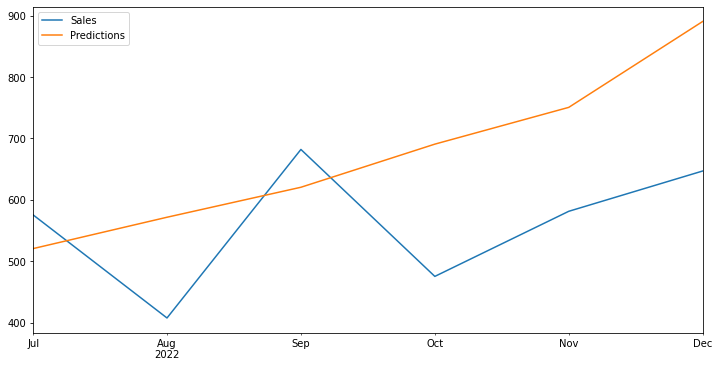

In [38]:
test.plot(figsize=(12,6))
plt.show()